127.0.0.1 - - [01/Nov/2022 01:32:54] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Nov/2022 01:32:54] "GET /favicon.ico HTTP/1.1" 200 -


guest
password


127.0.0.1 - - [01/Nov/2022 01:33:01] "POST /login HTTP/1.1" 301 -
127.0.0.1 - - [01/Nov/2022 01:33:01] "GET /choice_of_entropies HTTP/1.1" 200 -
127.0.0.1 - - [01/Nov/2022 01:33:01] "GET /static/css/main.css HTTP/1.1" 200 -
127.0.0.1 - - [01/Nov/2022 01:33:01] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [01/Nov/2022 01:33:06] "GET /shannon HTTP/1.1" 200 -
127.0.0.1 - - [01/Nov/2022 01:33:06] "GET /favicon.ico HTTP/1.1" 200 -


["b'size_n=100'"]
100


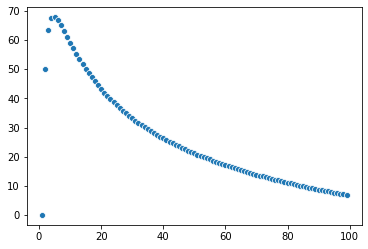

127.0.0.1 - - [01/Nov/2022 01:33:09] "POST /shannon HTTP/1.1" 301 -
127.0.0.1 - - [01/Nov/2022 01:33:09] "GET /chart HTTP/1.1" 200 -
127.0.0.1 - - [01/Nov/2022 01:33:09] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [01/Nov/2022 01:33:11] "GET /choice_of_entropies HTTP/1.1" 200 -
127.0.0.1 - - [01/Nov/2022 01:33:11] "GET /static/css/main.css HTTP/1.1" 200 -
127.0.0.1 - - [01/Nov/2022 01:33:11] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [01/Nov/2022 01:34:02] "GET /choice_of_entropies HTTP/1.1" 200 -
127.0.0.1 - - [01/Nov/2022 01:34:02] "GET /static/css/main.css HTTP/1.1" 200 -
127.0.0.1 - - [01/Nov/2022 01:34:02] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [01/Nov/2022 01:34:04] "GET /renyi HTTP/1.1" 200 -
127.0.0.1 - - [01/Nov/2022 01:34:04] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [01/Nov/2022 01:34:16] "GET /renyi HTTP/1.1" 200 -
127.0.0.1 - - [01/Nov/2022 01:34:16] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [01/Nov/2022 01:34:20] "GET /choice_of_entropies HTT

In [ ]:
# -*- coding: utf-8 -*-
from http.server import BaseHTTPRequestHandler, HTTPServer
import re
import cgi
import json
import psycopg2
import PySimpleGUI as sg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

class stats:
    size_n: int = 0
    size_l: int = 0
    k: int = 0
    q: int = 0  
    a: int = 0 
p = stats()

users = {'guest': 'password','guest2': 'password'}

class myHandler(BaseHTTPRequestHandler):

        
    def do_GET(self):
        self.send_response(200)
        self.send_header('Content-type','text/html')
        self.end_headers()
        path = self.path
        if path == "/":
            path = "/authorisation"
        try:
            file  = open("allpage"+path + ".html", 'r', encoding='utf-8')
        except FileNotFoundError:
            file  = open("allpage/404.html", 'r')

        message = file.read()
        file.close()
        self.wfile.write(bytes(message, "utf-8"))
        return

    def do_POST(self):
        path = self.path
        if path == "/login":
            content_len = int(self.headers.get('Content-Length'))
            post = self.rfile.read(content_len)
            post = post.decode('utf-8')
            login = re.split(r"&",str(post))[0]
            login = re.split(r"uname=",str(login))[1]
            password = re.split(r"&",str(post))[1]
            password = re.split(r"psw=",str(password))[1]
            print(login)
            print(password)
            if (login == list(users.keys())[0] and password == list(users.values())[0]):
                self.send_response(301)
                self.send_header('Location','/choice_of_entropies')
                self.end_headers()
#             elif (login == list(users.keys())[1] and password == list(users.values())[1]):
#                 self.send_response(301)
#                 self.send_header('Location','/chart')
#                 self.end_headers()
            else:
                self.send_response(301)
                self.send_header('Location','/authorisation')
                self.end_headers()
        #Обработчик подписки
        if path == "/shannon":
            content_len = int(self.headers.get('Content-Length'))
            post = self.rfile.read(content_len)
            sep = re.split(r"&",str(post))
            print(sep)
            p.size_n = re.split(r"size_n=",str(sep[0]))[1]
            p.size_n = re.sub(r"\'","",p.size_n)
            p.size_n = int(p.size_n)
#             p.size_l = re.split(r"size_l=",str(sep[1]))[1]
#             p.size_l = int(p.size_l)
            print(p.size_n)
            save_res = []
            for l_ in range(1, p.size_n, 1):
                sum_=0
                for i in range(0,l_ - 1, 1):
                    sum_ += ((p.size_n - i)/l_) * (math.log2(l_-i) - ((l_-i-1)/(l_-i))*(math.log2(l_-i-1)))
                save_res.append(sum_)
            sns.scatterplot(x=range(1, p.size_n), y=save_res)
            fig = plt.gcf()
            plt.show()
            plt.draw()
            fig.savefig('entropy.jpg', dpi=100)
            self.send_response(301)
            self.send_header('Location','/chart')
            self.end_headers()
        if path == "/renyi":
            content_len = int(self.headers.get('Content-Length'))
            post = self.rfile.read(content_len)
            sep = re.split(r"&",str(post))
            print(sep)
            p.size_n = re.split(r"size_n=",str(sep[0]))[1]
            p.size_n = int(p.size_n)
#             p.size_l = re.split(r"size_l=",str(sep[1]))[1]
#             p.size_l = int(p.size_l)
            p.a = re.split(r"a=",str(sep[1]))[1]
            p.a = re.sub(r"\'","",p.a)
            p.a = int(p.a)
            print(p.size_n,p.a)
            pr = ""
            max_ = 0
            const_=1/(1-p.a)
            save_res = []
            for l_ in range(1, p.size_n, 1):
                sum_=0
                for i in range(0,l_ - 1, 1):
                    sum_ += (p.size_n-i)/l_*((math.log2(1 + (l_-i-1)**p.a)) - (p.a * math.log2(l_-i)))
                save_res.append(const_*sum_)
                if (const_*sum_ > max_):
                    max_ = const_*sum_
                    pr = l_
            sns.scatterplot(x=range(1, p.size_n), y=save_res)
            fig = plt.gcf()
            plt.show()
            plt.draw()
            fig.savefig('entropy.jpg', dpi=100)
            self.send_response(301)
            self.send_header('Location','/chart')
            self.end_headers()
        if path == "/tsallis":
            content_len = int(self.headers.get('Content-Length'))
            post = self.rfile.read(content_len)
            sep = re.split(r"&",str(post))
            print(sep)
            p.size_n = re.split(r"size_n=",str(sep[0]))[1]
            p.size_n = int(p.size_n)
#             p.size_l = re.split(r"size_l=",str(sep[1]))[1]
#             p.size_l = int(p.size_l)
            p.k = re.split(r"k=",str(sep[1]))[1]
            p.k = int(p.k)
            p.q = re.split(r"q=",str(sep[2]))[1]
            p.q = re.sub(r"\'","",p.q)
            p.q = int(p.q)
            print(p.size_n,p.k,p.q)
            pr = ""
            max_ = 0
            const_=p.k/(p.q-1)
            save_res = []
            for l_ in range(1, p.size_n, 1):
                sum_=0
                for i in range(0,l_ - 1, 1):
                    sum_ += (p.size_n - i)/l_ * (1 - (1 + (l_ - i - 1)**p.q)/(l_ - i)**p.q)
                save_res.append(const_*sum_)
                if (const_*sum_ > max_):
                    max_ = const_*sum_
                    pr = l_
            sns.scatterplot(x=range(1, p.size_n), y=save_res)
            fig = plt.gcf()
            plt.show()
            plt.draw()
            fig.savefig('entropy.jpg', dpi=100)
            self.send_response(301)
            self.send_header('Location','/chart')
            self.end_headers()
            
            

server = HTTPServer(('127.0.0.1', 8081), myHandler)
server.serve_forever()